# Introduction

In this example we fit our model for the case where we have repeated observations for the same input.

# Initialise

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from HeteroscedasticGP.Models import BasicRegressor

# Make data

In [ ]:
# Fixing seed for example
np.random.seed(42)

# Inputs
n_repeat = 100
X = np.repeat(0, n_repeat)
X = np.append(X, np.repeat(1, n_repeat))
X = np.append(X, np.repeat(2, n_repeat))
X = np.vstack(X)
true_var = np.repeat(0.3, n_repeat)
true_var = np.append(true_var, np.repeat(1, n_repeat))
true_var = np.append(true_var, np.repeat(1.5, n_repeat))

# True function
f_true = np.sin(X).ravel()

# Generate noisy outputs
y = f_true + true_var * np.random.randn(len(X))

# True over new inputs
X_star = np.vstack(np.linspace(0, 2, 50))
f_star_true = np.sin(X_star).ravel()

# Extract true z
z_true = np.log(np.unique(true_var))


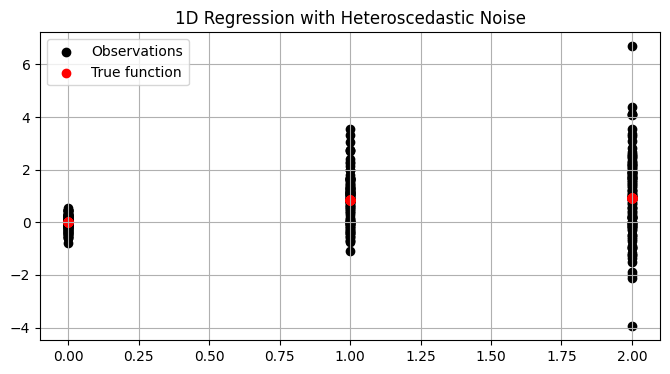

In [10]:
plt.figure(figsize=(8, 4))
plt.scatter(X, y, c="black", label="Observations")
plt.scatter(X, f_true, c="red", label="True function")
plt.legend()
plt.title("1D Regression with Heteroscedastic Noise")
plt.grid()
plt.show()

# Fit model

In [11]:
m = BasicRegressor(ARD=False)

In [12]:
f_params0 = {'lengthscale': 1}
z_params0 = {'lengthscale': 1}
z0 = np.zeros(3)
m.train(X, y, f_params0=f_params0, z_params0=z_params0, z0=z0, z0_mean=0)

In [13]:
assert m.repeated_X == True
assert np.array_equal(m.J_list[0], np.arange(0, n_repeat))
assert np.array_equal(m.J_list[1], np.arange(n_repeat, n_repeat*2))
assert np.array_equal(m.J_list[2], np.arange(n_repeat*2, n_repeat*3))
assert m.U == 3

# Predictions

In [14]:
mu_star, var_star, z_star = m.predict(X_star)

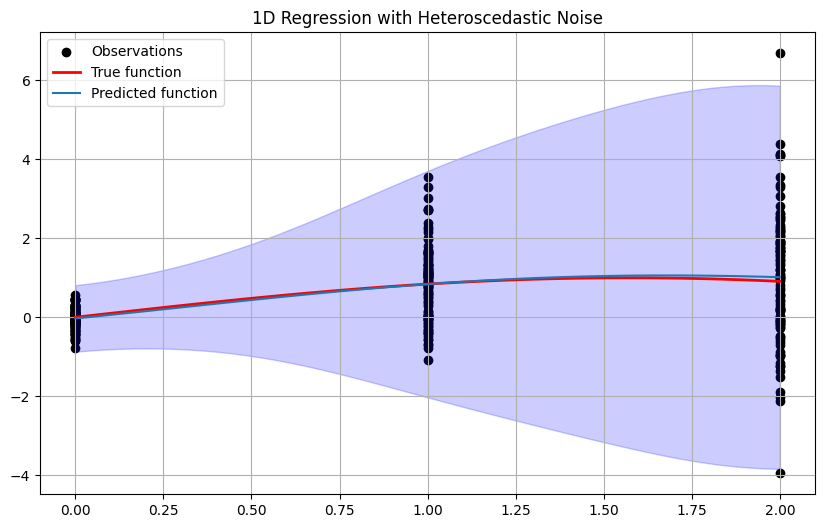

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c="black", label="Observations")
plt.plot(X_star, f_star_true, "r", lw=2, label="True function")
plt.plot(X_star, mu_star, label="Predicted function")
plt.fill_between(
    X_star.ravel(),
    mu_star - 3 * np.sqrt(var_star),
    mu_star + 3 * np.sqrt(var_star),
    color="blue", alpha=0.2
)
plt.legend()
plt.title("1D Regression with Heteroscedastic Noise")
plt.grid()
plt.show()